In [23]:
import numpy as np
import matplotlib
# matplotlib.use('PDF')
import matplotlib.pyplot as plt
import os
import regex
import pandas as pd

conv = 1
folders = [f"{i}" for i in range(0,13,2)]
# folders = ["0.0","1.0","2.0"]
mainPath = f"/idiap/temp/vpocard/ImageNetTF/More_classes/Experiment2/ResultMax/"


Empty DataFrame
Columns: []
Index: [0, 2, 4, 6, 8, 10, 12]
last mean= 9.008
last mean= 9.908
last mean= 9.879999999999999
last mean= 10.076
last mean= 9.995999999999999
last mean= 9.8
last mean= 11.097333333333333
    2.0  3.0  4.0
0     1    6    1
2     1    6    1
4     1    6    1
6     1    6    1
8     1    6    1
10    1    6    1
12    0    6    0
54
show pic


<ipython-input-24-c8351ac14f71>:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,lines[i])


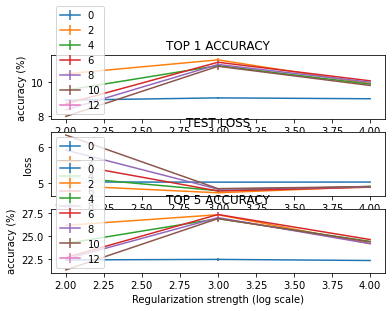

pic showed
[[9.0600004e+00 5.0192213e+00 2.2429333e+01 7.8875430e-02 6.3356417e-03
  1.5028466e-01 0.0000000e+00]
 [1.1325334e+01 4.7216682e+00 2.7356667e+01 9.4838656e-02 1.0804538e-02
  2.2154893e-01 2.0000000e+00]
 [1.0982000e+01 4.7797551e+00 2.6923334e+01 7.8211963e-02 1.3973825e-02
  1.2636250e-01 4.0000000e+00]
 [1.1182667e+01 4.7720499e+00 2.7379333e+01 1.5452771e-01 1.7553914e-02
  3.0607393e-01 6.0000000e+00]
 [1.1050000e+01 4.8236132e+00 2.7036667e+01 2.2121634e-01 2.5716024e-02
  3.6899191e-01 8.0000000e+00]
 [1.0942000e+01 4.8374934e+00 2.6932667e+01 2.0221385e-01 2.0845277e-02
  3.8789394e-01 1.0000000e+01]
 [1.1097333e+01 4.8237720e+00 2.7200666e+01 1.7187506e-01 2.2545869e-02
  3.8250801e-01 1.2000000e+01]]


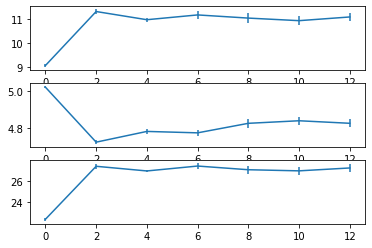

<Figure size 432x288 with 0 Axes>

In [24]:



# folders += []
pdCount = pd.DataFrame(index=folders)
print(pdCount)

meansDict = {}
stdsDict  = {}

legend = {}
for f in folders:
    legend[f] = str(f)


titles = ["TOP 1 ACCURACY", "TEST LOSS","TOP 5 ACCURACY"]
lines = [1,2,3,2]
ylabels = ["accuracy (%)" , "loss","accuracy (%)" ]

text = ""
result = []
test = []
for f in folders:
    path = mainPath + f + "/"
    X = []
    datas = {}
    
    for file in os.listdir(path):
        if not "npy" in file:
            continue
        if "evidence" in file:
            continue
        

        logPen = float( file.split("_")[0])
        # if logPen < 8:
        #     continue
        run = int( file.split("run")[-1].split(".")[0])
        # if run >2: 
        #     continue
        

        data = np.load(path+file)*100
        if data.shape[0] < 100:
            text = (path+file).split("/")[-2:]
            # print(text)
            # print(data.shape)

        if data.shape[0] < 75:
            continue
        if data.shape[1] == 4:
            data = data[:,:3]
        data = data[:100,:3]
        if not logPen in X:
            X.append(logPen)
            datas[logPen] = []
            if logPen not in pdCount:
                pdCount[logPen] = 0
        pdCount[logPen][f] += 1
        data=data[:100,:]
        data[:,1] = data[:,1]/100
        for i in [1  ]:# # range(1,3):
            datas[logPen].append(data[-i].tolist())#.mean(axis=0)


    X.sort()
    if X == []:
        continue
    while X[0] < -3:
        X.pop(0)

    means , stds = [] , []
    meansDict[f] = {}
    stdsDict[f] = {}
    for x in X:
        
        npArray = np.array(datas[x])
        # print(x,npArray.shape[0])
        # print(npArray.shape)
        means.append(npArray.mean(axis=0).tolist())
        # means.append( np.median(npArray,0).tolist())
        stds.append(npArray.std(axis=0).tolist()/np.sqrt(npArray.shape[0]) )

        

        if np.isnan( means[-1]).any():
            means[-1] = [0 ,0 ,0]
            stds[-1]  = [0, 0 ,0]
        
        meansDict[f][x] = means[-1]
        stdsDict[f][x]  = stds[-1]
        
    means = np.array(means)
    print(f"last mean=",means[-1][0])
    stds = np.array(stds)
    # print(means)
    for i in range(3):
        
        plt.subplot(3,1,lines[i])
        plt.title(titles[i])
        plt.errorbar(X,means[:,i],stds[:,i],label=legend[f])
        plt.ylabel(ylabels[i])
        
        plt.xlabel("Regularization strength (log scale)")
        plt.legend()
    text += (f"max {f} =  {means.max(axis=0)[0],means.max(axis=0)[2],means.min(axis=0)[1]}\n")
    # print("mean max=",means.max(axis=0))
    # input()
    indexSTD = [means.argmax(axis=0)[0] , means.argmin(axis=0)[1] ,means.argmax(axis=0)[2]  ]
    var = [ means.max(axis=0)[0],means.min(axis=0)[1],means.max(axis=0)[2] ]
    
    for i in range(3):
        var.append(stds[indexSTD[i],i])
    var.append((f))
    result.append(var  )
pdCount = pdCount.reindex(sorted(pdCount.columns), axis=1)
print(pdCount)
print(pdCount.sum().sum())
plt.legend()
print("show pic")
plt.show()
print("pic showed")
plt.savefig("/idiap/temp/vpocard/ImageNetTF/More_classes/Experiment/Graphics/lossPlot1")
plt.close()
result = np.array(result,dtype=np.float32)
print(result)

np.save(mainPath+"result",result)
for i in range(3):
    Y = [ r[i] for r in result  ]
    stdY = [ r[i+3] for r in result  ]
    X = [  r[-1] for r in result ]
    plt.subplot(3,1,i+1)
    plt.errorbar(X,Y,stdY)

plt.show()
plt.savefig("/idiap/temp/vpocard/ImageNetTF/More_classes/Experiment/Graphics/lossPlot2")
